# Entity Extraction Workshop Exercise 1: Colorful Word Embeddings

In this exercise, we will deepen our knowledge of **word embedding vectors** by using them in practice to group hundreds of words based on their meanings.

## Part 1: Playing with word vectors

Let's first load a word embedding model with Gensim's downloader API:

In [2]:
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-200')

[==================================================] 100.0% 252.1/252.1MB downloaded


We can then access word embedding vectors with the following syntax:

In [3]:
model['house']

array([ 4.7641e-01, -5.6269e-04,  4.9202e-02, -7.3879e-01,  3.7132e-02,
       -1.2158e-01, -4.6408e-02,  2.3389e-01,  8.8552e-02,  2.3504e-01,
        4.9984e-01, -2.5752e-02,  8.6279e-01, -5.6084e-01, -1.5898e-02,
        3.8606e-01, -4.0744e-01, -7.8242e-02, -4.9744e-01,  2.3597e-01,
       -2.5095e-01,  2.5800e+00,  2.3732e-01, -1.3906e-01,  3.2639e-01,
       -3.9747e-01, -7.6958e-02, -2.7866e-01,  4.1035e-01,  2.3829e-01,
       -4.1175e-02, -6.7140e-01,  4.4805e-01,  1.9617e-01, -5.8027e-01,
        1.7948e-01, -9.3515e-02, -3.6991e-01,  8.2635e-01,  1.7027e-01,
       -1.0140e-01,  5.4630e-02, -1.8867e-01,  5.2122e-01, -1.5975e-01,
        1.3666e-01,  5.4290e-01,  1.9361e-01, -9.2103e-02,  5.6441e-01,
        1.4980e-02,  1.5426e-01,  4.4921e-01,  2.5681e-01, -3.7364e-02,
       -4.5421e-02,  1.8183e-01, -1.2785e-01, -2.4702e-01,  3.6216e-01,
        5.0130e-01,  2.7318e-01,  1.0898e-01, -2.7041e-01,  3.7572e-01,
       -7.0259e-01, -9.0682e-01, -1.8616e-01, -4.0091e-02,  4.05

**Questions**:
  1. What are the dimensions of the vectors returned by this model?
  2. What are the three words most similar to the word *gray* in the model? What are the three most similar words to *kitchen*? (Hint: use the function model.most_similar)
  3. What is an example of two words that are very dissimilar from one another in the model? (use the function model.similarity)

In [38]:
print('1.The vectors returned by this model have a {} dimension'.format(model['house'].shape))
print("\n2.The 3 most similar words to 'gray' are: {}".format(', '.join([x[0] for x in model.most_similar('gray')[:3]])))
print("The 3 most similar words to 'kitchen' are: {}".format(', '.join([x[0] for x in model.most_similar('kitchen')[:3]])))
print("\n3.The words 'king' and 'sabich' are very dissimlar with a score of {}".format(model.similarity('king', 'sabich')))


1.The vectors returned by this model have a (200,) dimension

2.The 3 most similar words to 'gray' are: grey, brown, dark
The 3 most similar words to 'kitchen' are: bathroom, room, dining

3.The words 'king' and 'sabich' are very dissimlar with a score of -0.20750475556999767


We discussed in class how **word analogies** (e.g. king-queen=waiter-waitress) can be reflected by adding and subtracting word vectors. Consider the following code:

In [39]:
model.most_similar(positive = ['cow', 'pork'], negative = ['beef'], topn = 3)

[('pig', 0.6433343887329102),
 ('hog', 0.572226881980896),
 ('pigs', 0.5682295560836792)]

**Questions:**
  4. What do you think the arguments *positive=* and *negative=* mean above? What kind of word analogy does this give us?
  5. Find another example of a word analogy using the most_similar function.

Positive and Negative are the operations we would like to perform on the vectors, in this example:

cow + pork - beef

The result is 'beef is to cow what pork is to ...'

In [45]:
model.most_similar(positive = ['blue', 'grass'], negative = ['sky'], topn = 3)

[('green', 0.488902747631073),
 ('red', 0.43268051743507385),
 ('striped', 0.4285241961479187)]

In [70]:
model.most_similar(positive = ['rich', 'sad'], negative = ['happy'], topn = 3)

[('impoverished', 0.431552529335022),
 ('vast', 0.42239266633987427),
 ('shaba', 0.41426998376846313)]

## Part 2: Coloring Words

For this exercise, we will be analyzing the list of words in the attached file *mixed_words.txt*.

**Questions:**
  6. Look through the list of words. Do you see any patterns? What topics do you think are covered by these words?
  7. Load the words into a Python array. How many of the words are found in our word embedding model? What word(s) are missing?
  8. Make a matrix X whose rows are the word embedding vectors for each word in the model. (Hint: You can call model[ list ] for a list of words.) What are the dimensions of this matrix?
  9. Cluster the words by using sklearn.cluster.KMeans with n_clusters = 2, fitting it to the matrix X, and save the predicted labels in a variable called *labels*. What are some examples of words in each cluster?

In [73]:
import numpy as np

word_list = np.loadtxt('mixed_words.txt', dtype='str')

array(['conjunction', 'individualism', 'walnut', 'green', 'coffee',
       'thesis', 'pemmican', 'precinct', 'sulfur', 'stew', 'tawny',
       'dandelion', 'jam', 'grape', 'synthesis', 'plum', 'orange', 'or',
       'weaker', 'context', 'obverse', 'brass', 'tamale', 'mustard',
       'completeness', 'oak', 'postulate', 'tofu', 'khaki', 'plod',
       'extension', 'icing', 'free', 'paradox', 'cookie', 'sepia',
       'medium', 'metaphysics', 'eggshell', 'structure', 'tacit',
       'denial', 'mauve', 'inconsistency', 'logic', 'coral', 'bone',
       'ivory', 'russet', 'attribute', 'oatmeal', 'lavender', 'magenta',
       'solve', 'obsidian', 'sound', 'saffron', 'buff', 'member', 'grits',
       'spaghetti', 'sand', 'coop', 'snag', 'limit', 'argument', 'figure',
       'caviar', 'stronger', 'derive', 'jerky', 'maximal', 'yellow',
       'distributive', 'kedgeree', 'shadow', 'tempeh', 'marmalade',
       'rundown', 'garnet', 'innuendo', 'tableau', 'proposition', 'book',
       'axiom', 'c

These words seem to all belong to a shortlist of topics:
- colors, fruits, materials, concepts, grammar words

I don't see any pattern though

In [81]:
print([word for word in word_list if word not in model])

['kedgeree']


In [106]:
word_list = np.array([word for word in word_list if word in model])
X = model[word_list]
print('The shape of this array is {}'.format(X.shape))

The shape of this array is (321, 200)


In [112]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X)
labels = kmeans.labels_
print('Cluster 1:\n{}'.format(', '.join(word_list[np.where(labels==1)])))

Cluster 1:
conjunction, individualism, thesis, precinct, synthesis, or, weaker, context, obverse, completeness, postulate, plod, extension, free, paradox, metaphysics, structure, tacit, denial, inconsistency, logic, attribute, solve, sound, member, snag, limit, argument, figure, stronger, derive, maximal, distributive, shadow, rundown, innuendo, tableau, proposition, book, axiom, particular, schema, contradiction, implication, open, comprehension, closed, depth, theory, negative, induce, corollary, complement, detective, determine, connotation, false, cop, converse, conditional, premise, detail, mark, cardinal, difference, shield, down, categorical, dichotomy, cover, eminence, conclude, composite, soundness, term, scope, proof, reduce, concrete, alternation, induction, modality, dilemma, subaltern, deductive, law, formula, natural, theorem, consistency, minor, conclusion, lineup, fallacy, dragnet, model, sting, inverse, inspector, function, policeman, roll, true, negation, abduction, r

In [113]:
print('Cluster 2:\n{}'.format(', '.join(word_list[np.where(labels==0)])))

Cluster 2:
walnut, green, coffee, pemmican, sulfur, stew, tawny, dandelion, jam, grape, plum, orange, brass, tamale, mustard, oak, tofu, khaki, icing, cookie, sepia, medium, eggshell, mauve, coral, bone, ivory, russet, oatmeal, lavender, magenta, obsidian, saffron, buff, grits, spaghetti, sand, coop, caviar, jerky, yellow, tempeh, marmalade, garnet, charcoal, biscuit, blonde, bread, liver, jelly, giblet, boot, platinum, peach, grey, ebony, handcuffs, pastry, silver, bailiff, avocado, curry, snow, cocoa, bolo, crackling, beige, sauerkraut, pansy, syrup, smoke, rust, flesh, marinade, salad, straw, ginger, slop, gray, shrimp, cereal, linen, pizza, graphite, purple, bloated, red, tart, color, heliotrope, sauce, champagne, mash, grit, blond, pumpkin, oyster, hazel, bluish, caramel, cream, copper, violet, honey, bronze, fawn, wheat, pink, mince, soybean, melon, citron, golden, apricot, poke, sushi, chili, swallow, lime, blush, meat, gold, slate, mint, patina, cornstarch, dressing, pie, lawma

The first cluster is more leaning towards words that are concepts, e.g. matphysics, theorem, rewriting...
The second cluster is more descriptive of physical entities: caviar, oak, collar

Now let's use PCA to project our data points onto two dimensions and visualize them. The colors displayed correspond to the k-means clusters:

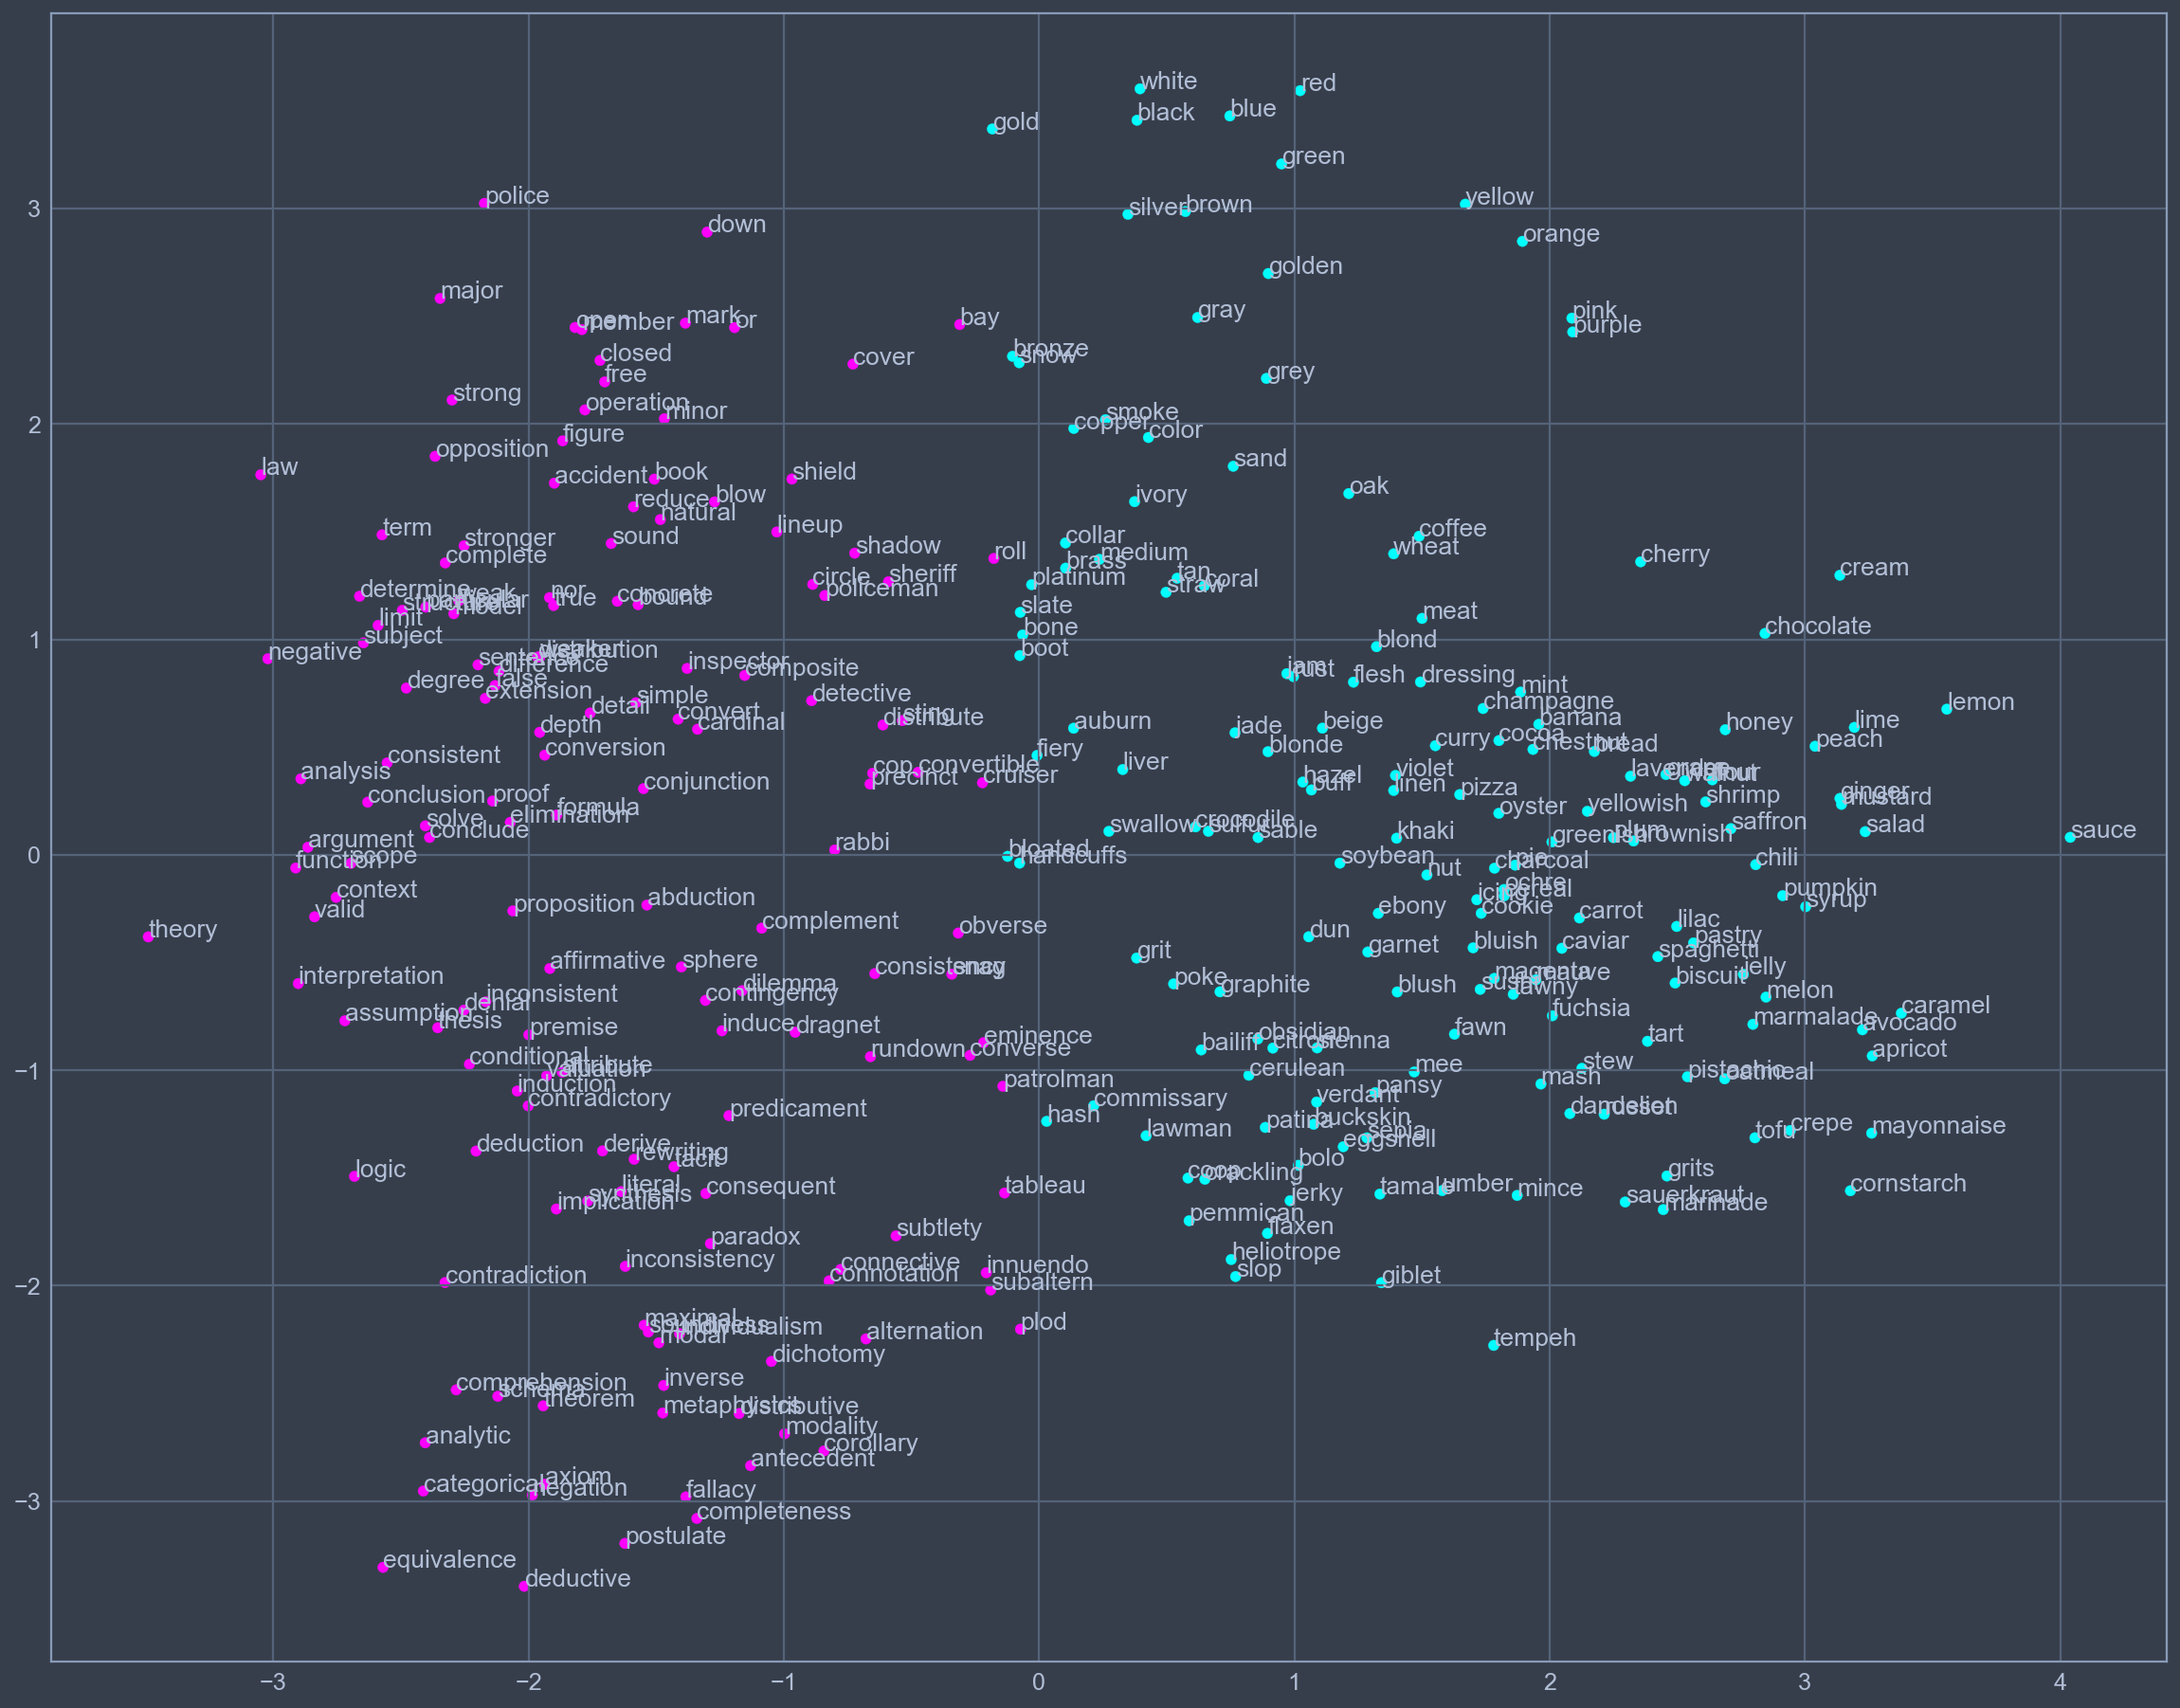

In [120]:
# matplotlib theme
from jupyterthemes import jtplot
jtplot.style()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import pylab

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 16))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(word_list):
    ax.annotate(word, xy=(Y[i, 0], Y[i, 1]))

**Question:**
  10. Try re-running this code with different numbers of k-means clusters. What do you think the right number of clusters should be? What do the clusters represent.

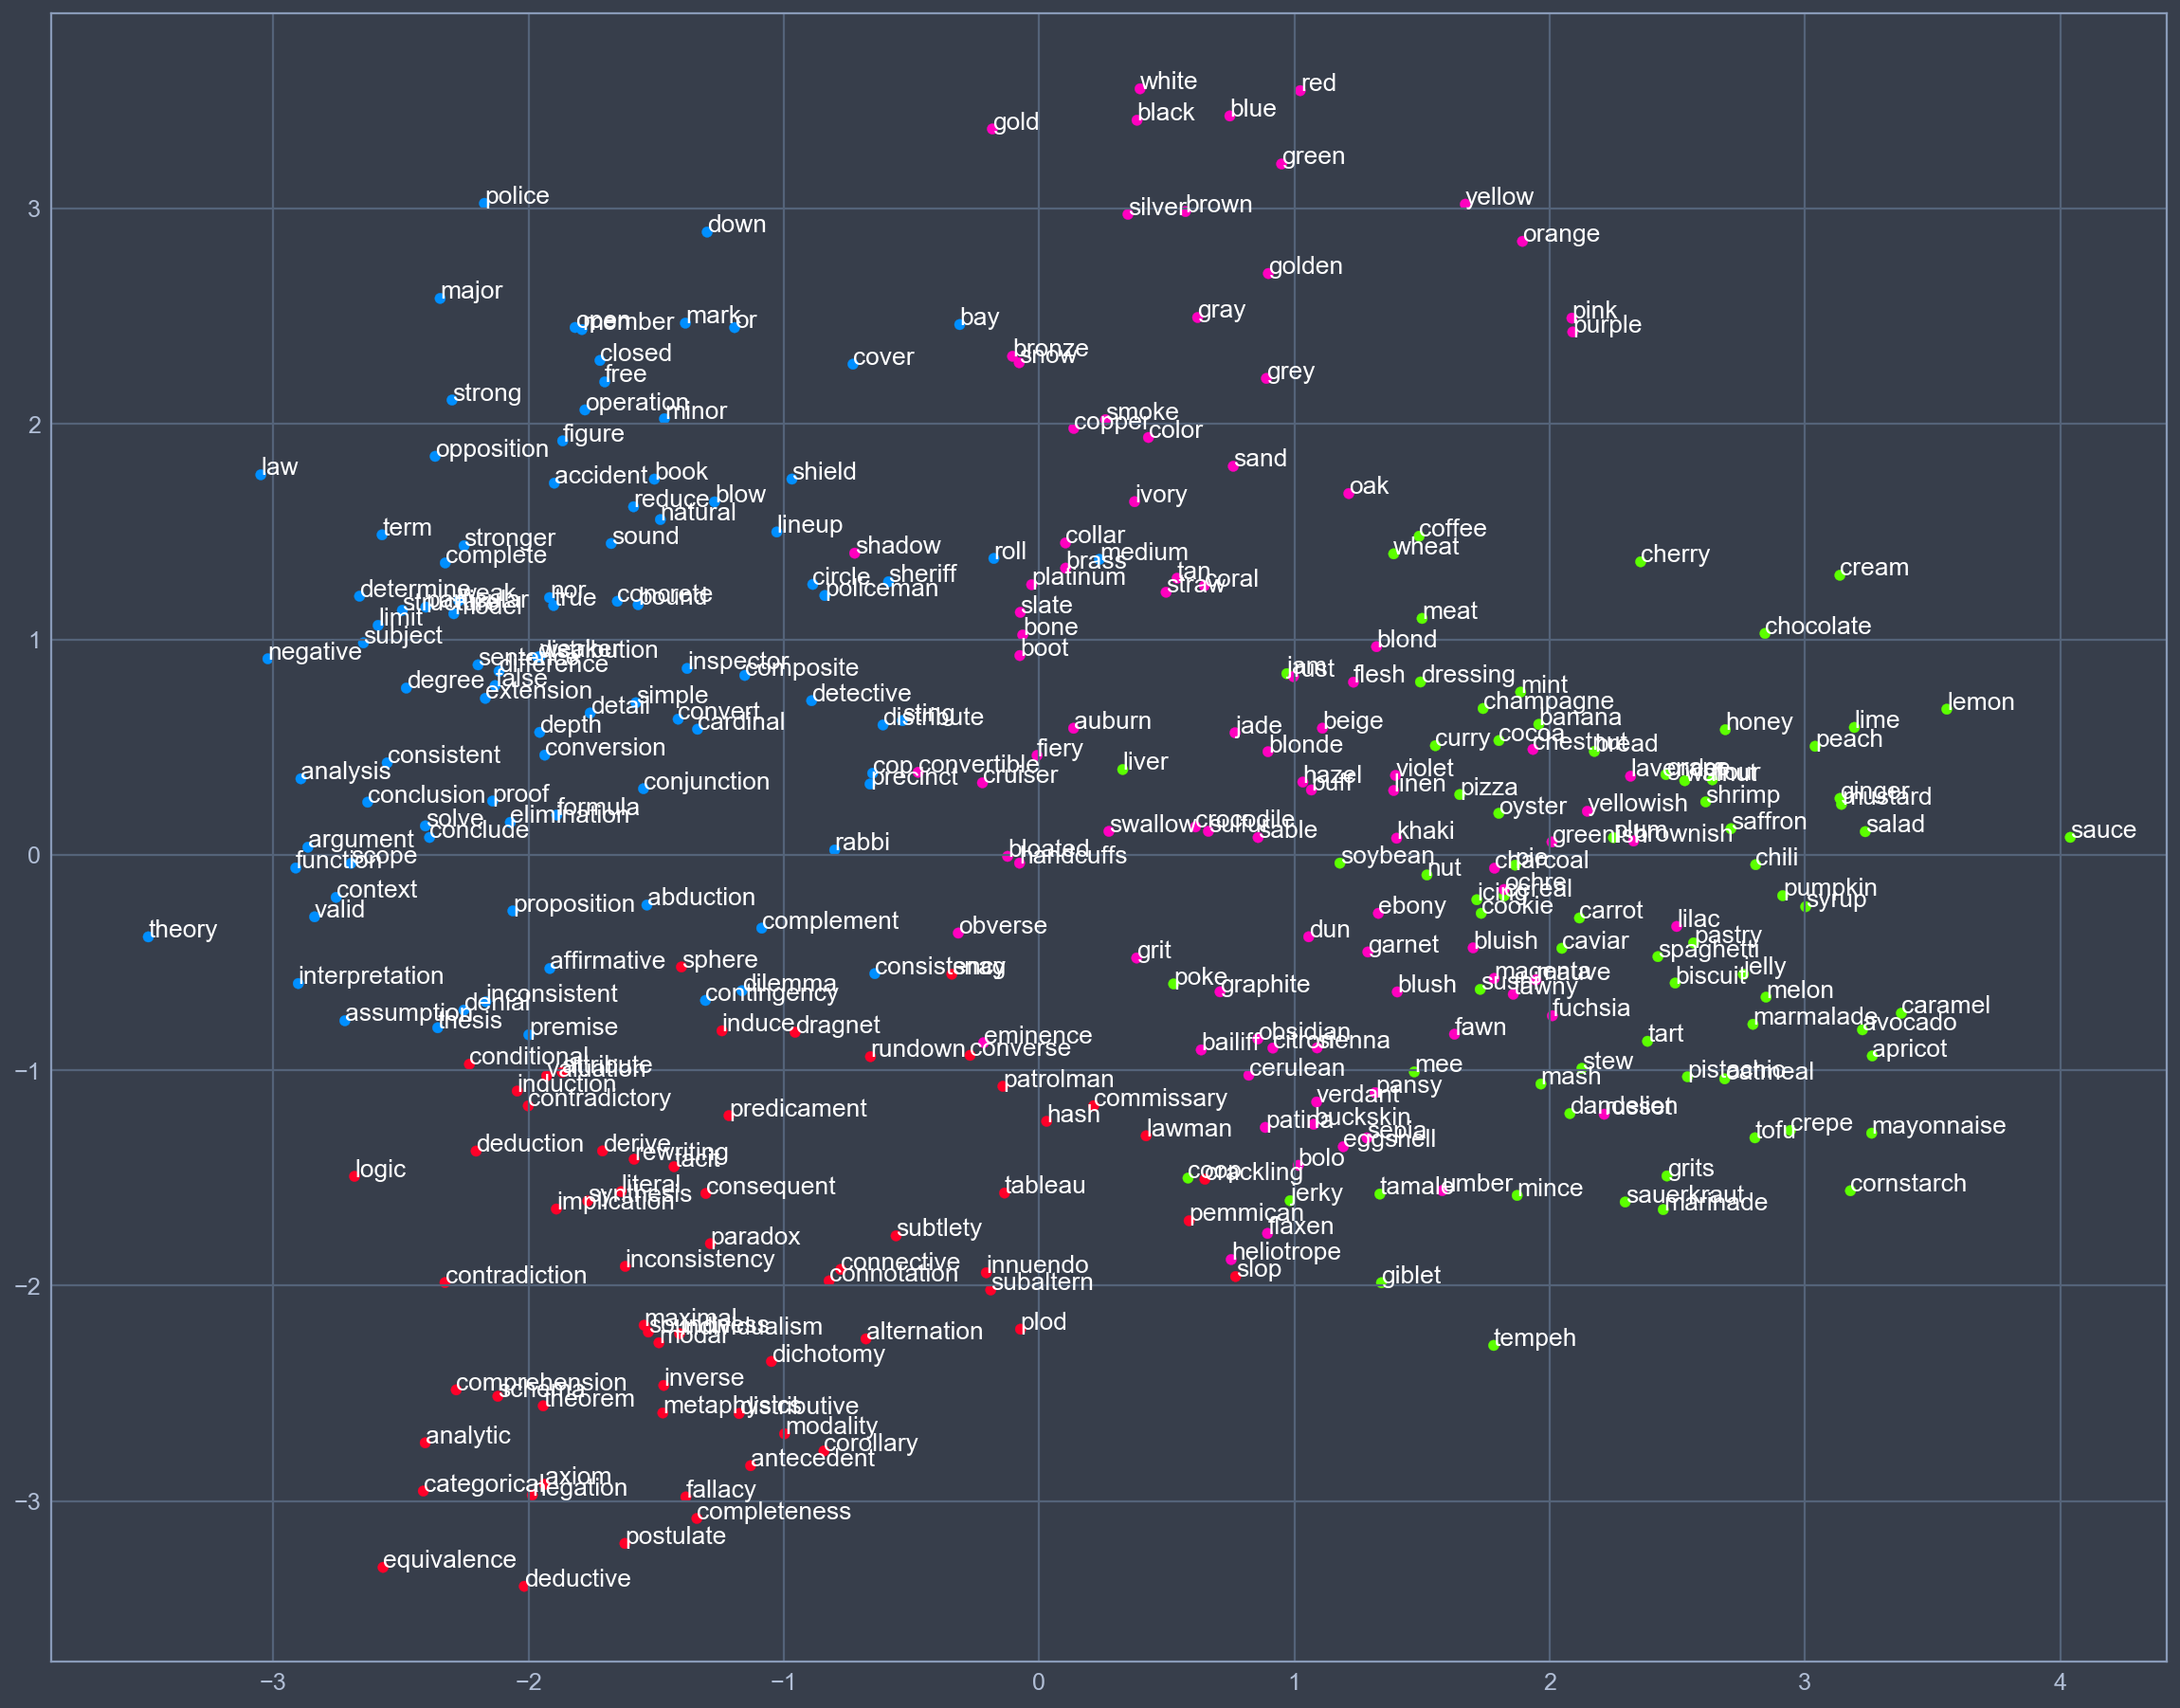

In [137]:
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 16))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'gist_rainbow')
for i, word in enumerate(word_list):
    ax.annotate(word, xy=(Y[i, 0], Y[i, 1]), color='white')

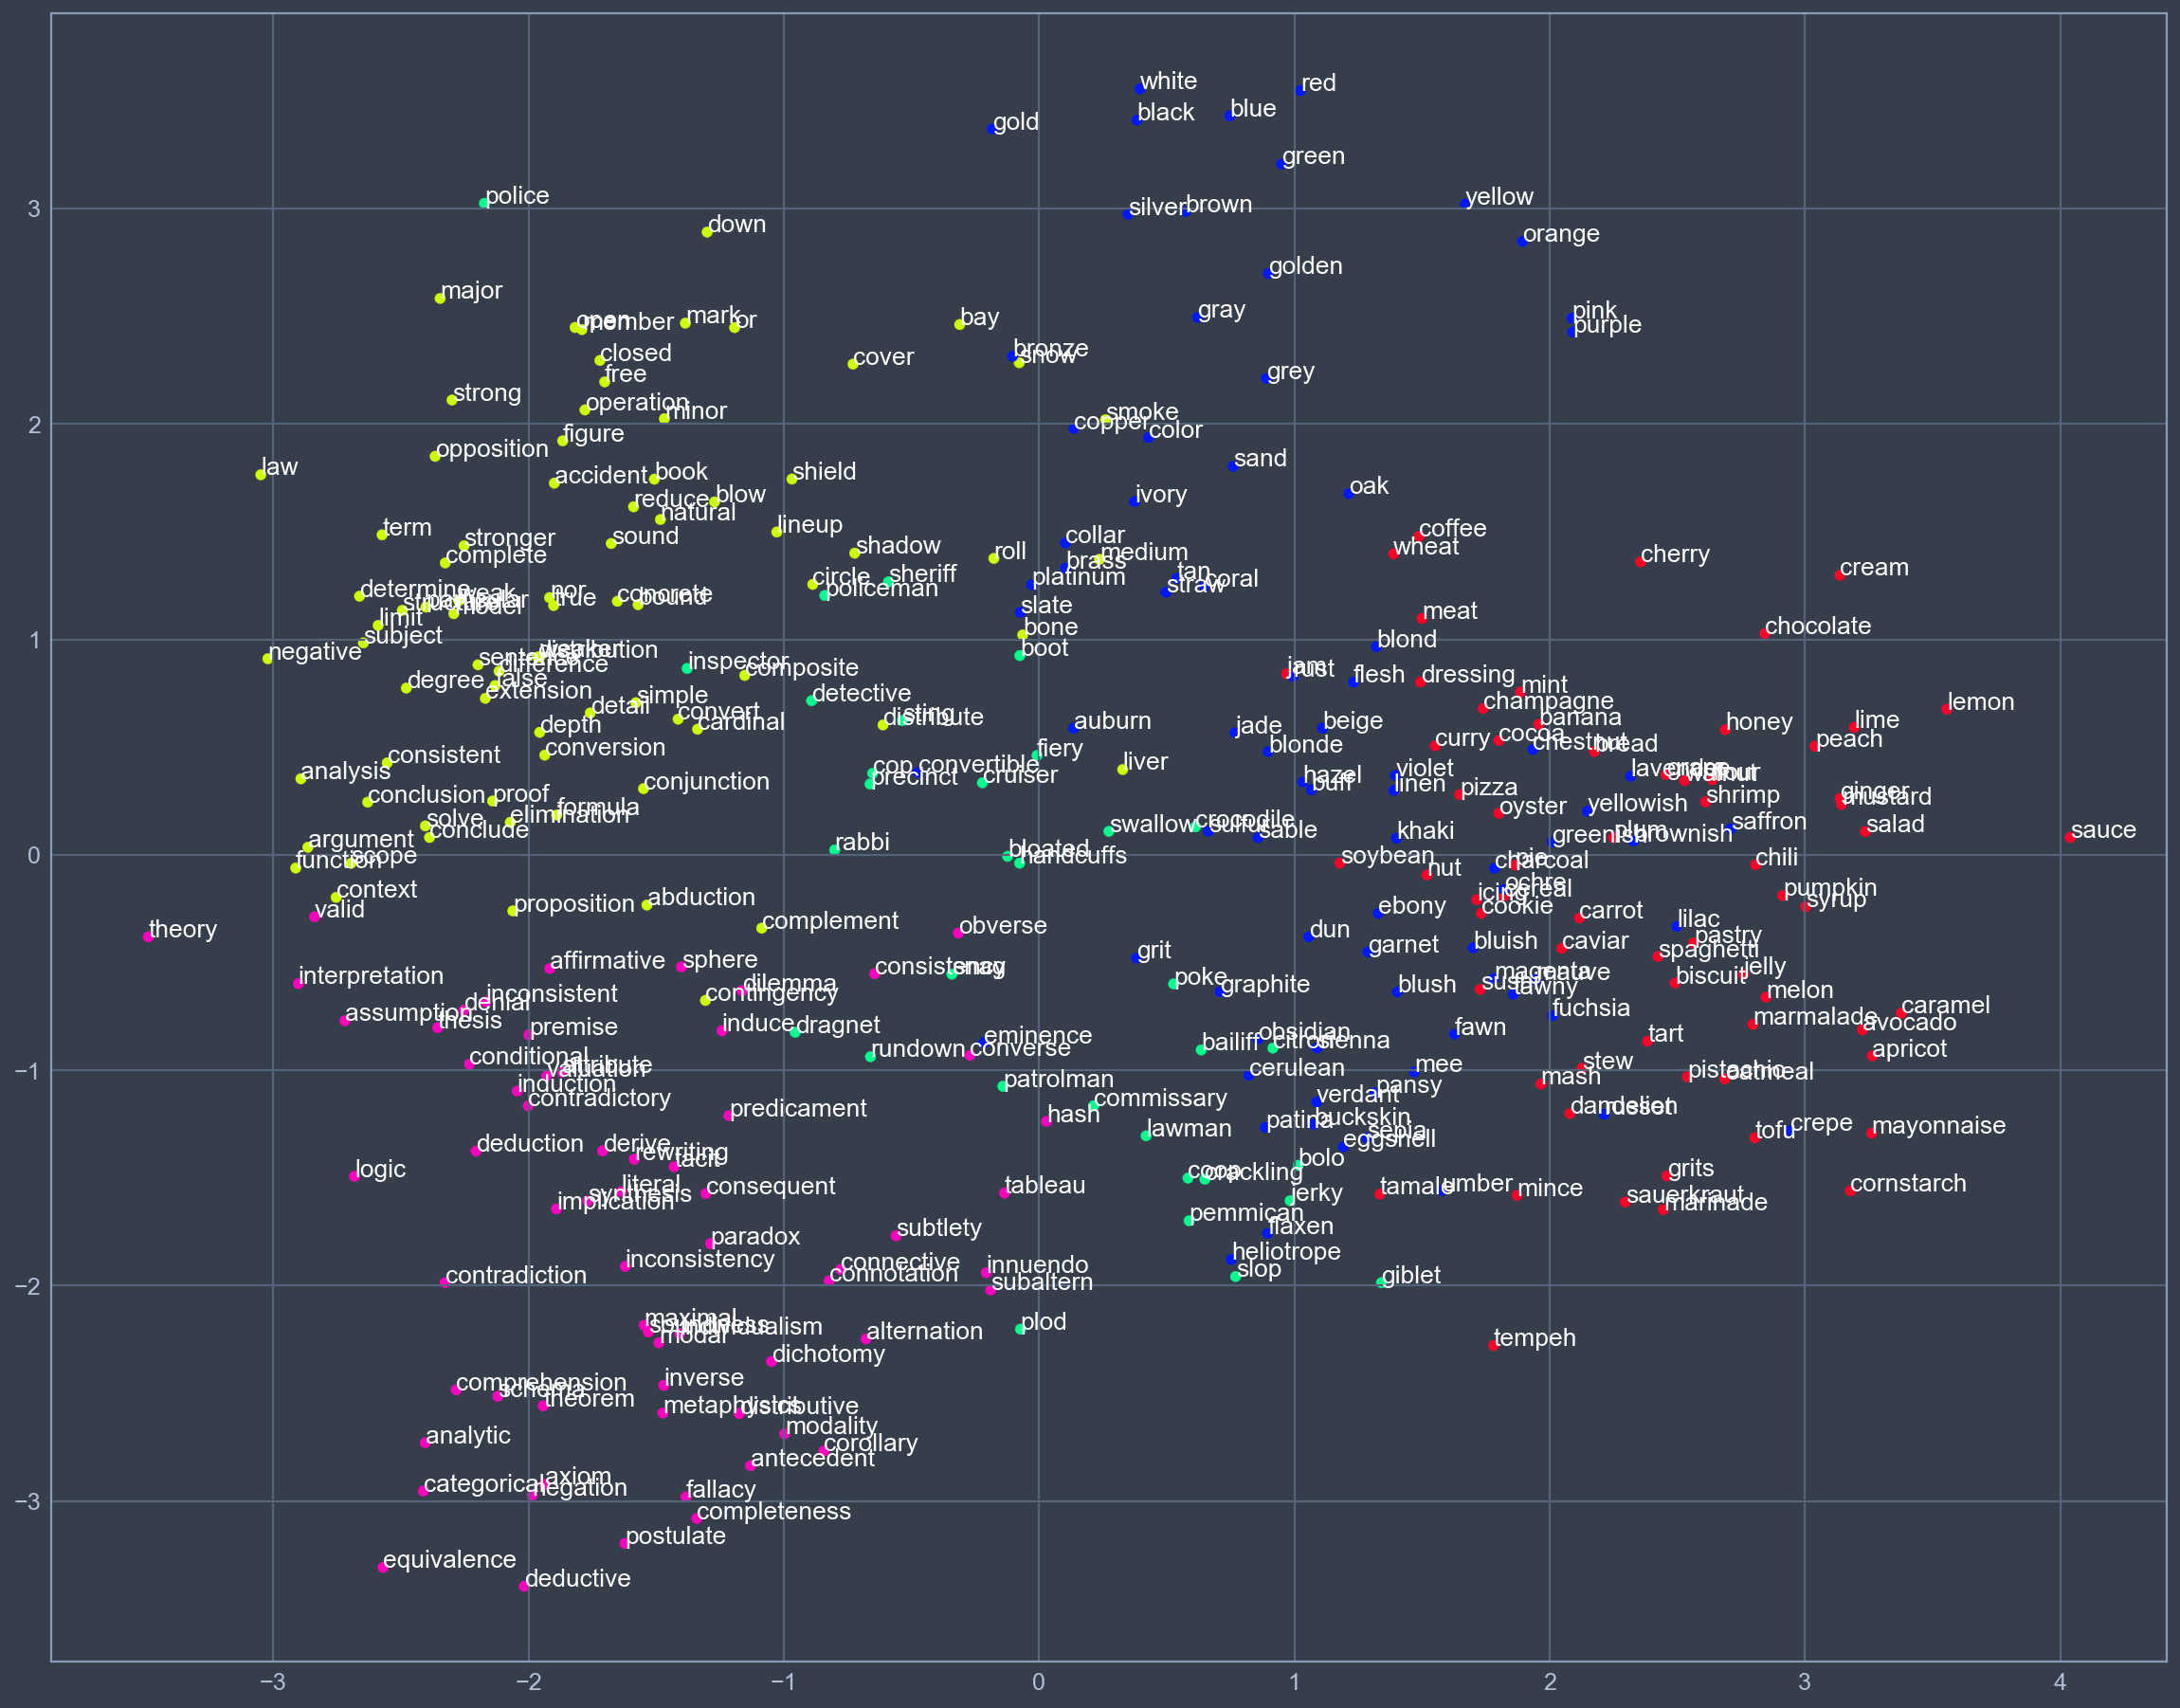

In [138]:
kmeans = KMeans(n_clusters=5).fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 16))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'gist_rainbow')
for i, word in enumerate(word_list):
    ax.annotate(word, xy=(Y[i, 0], Y[i, 1]), color='white')

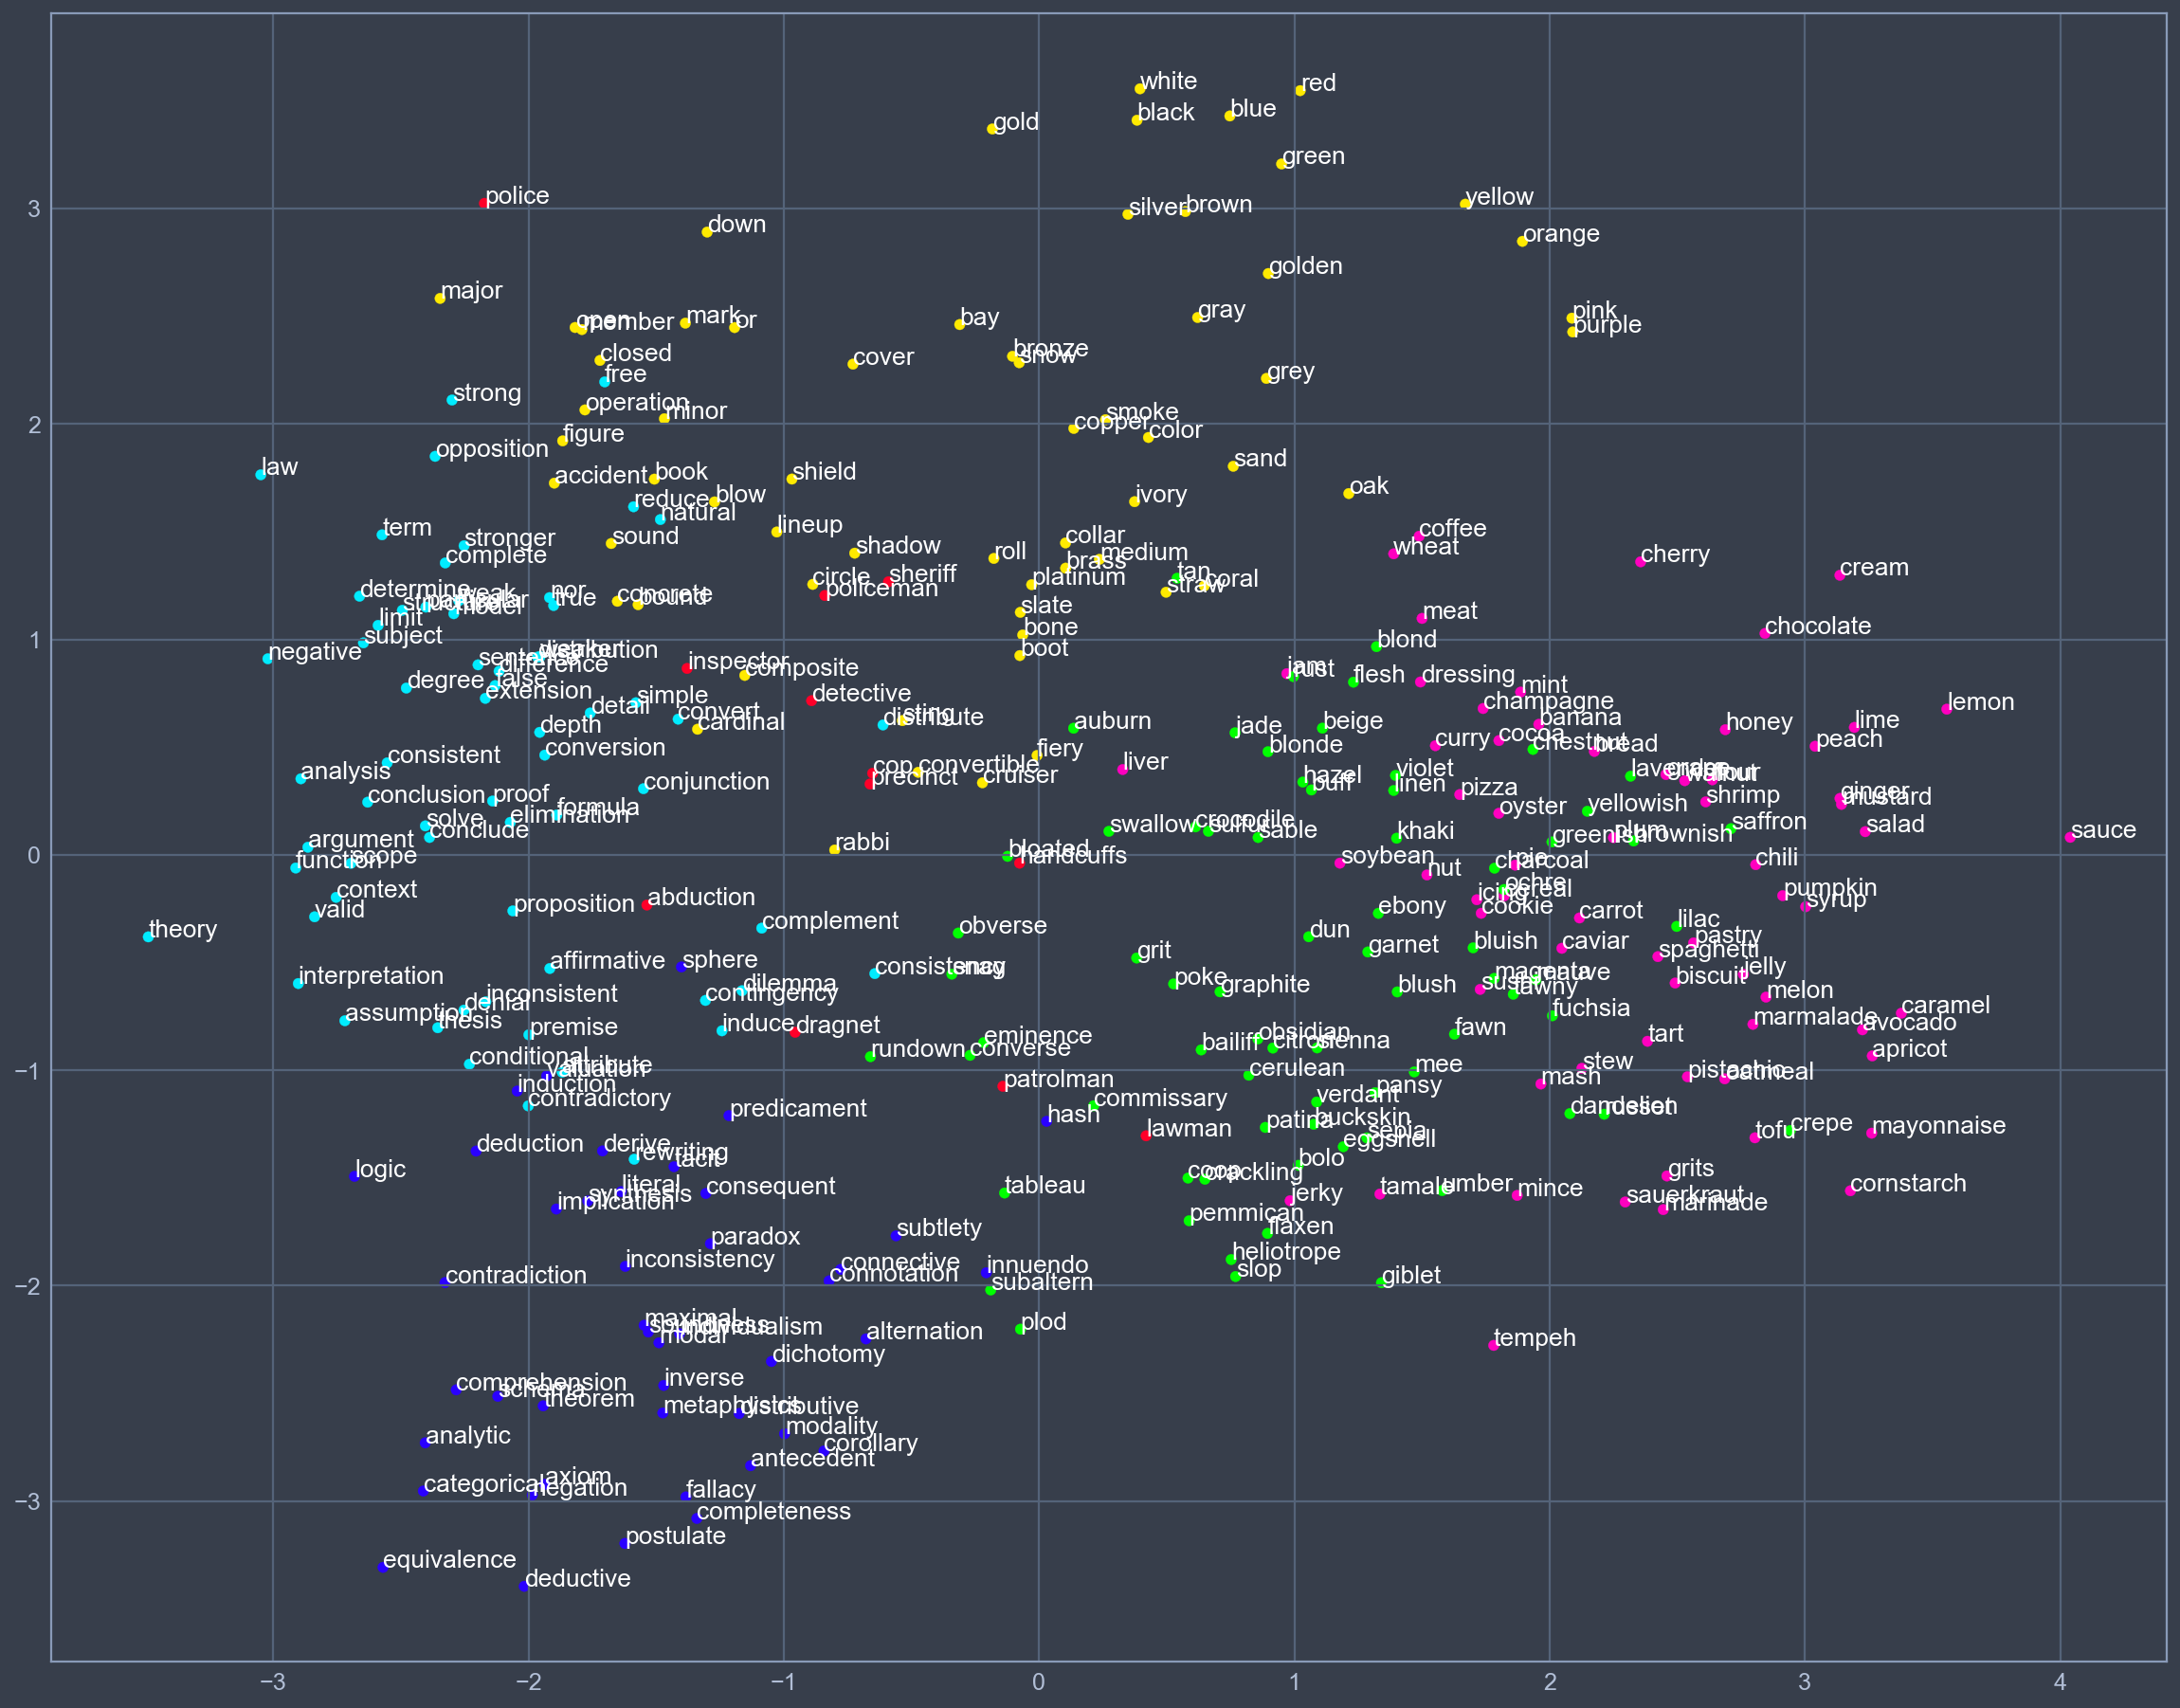

In [139]:
kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.labels_

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 16))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'gist_rainbow')
for i, word in enumerate(word_list):
    ax.annotate(word, xy=(Y[i, 0], Y[i, 1]), color='white')

I believe 5 is the right number of clusters, below that we see policemen and sheriff in the same cluster as colours, but with 6 clusters it starts mixing clusters together, like colors and concepts (accident, figure in the yellow cluster)